<a href="https://colab.research.google.com/github/mamathaguntu/CMPE255/blob/master/Clustering_Assignment/DM_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clustering Techniques##

Dataset used - covid vaccination progress from Kaggle.com

This dataset contains columns such as location , vaccine , and the total number of vaccinations done in that location.

import libraries 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import io


Read and display data

In [5]:
vaccine_data = pd.read_csv('/content/sample_data/country_vaccinations_by_manufacturer.csv')
vaccine_data

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31289
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
22116,European Union,2021-11-23,Oxford/AstraZeneca,67215194
22117,European Union,2021-11-23,Pfizer/BioNTech,440756612
22118,European Union,2021-11-23,Sinopharm/Beijing,2157500
22119,European Union,2021-11-23,Sinovac,9


In [6]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22121 entries, 0 to 22120
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            22121 non-null  object
 1   date                22121 non-null  object
 2   vaccine             22121 non-null  object
 3   total_vaccinations  22121 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 691.4+ KB


In [7]:
vaccine_data.shape

(22121, 4)

get the list of vaccinations

In [8]:
vaccine_data['vaccine'].unique()

array(['Johnson&Johnson', 'Moderna', 'Oxford/AstraZeneca',
       'Pfizer/BioNTech', 'Sinovac', 'CanSino', 'Sputnik V',
       'Sinopharm/Beijing'], dtype=object)

Remove countries with zero vaccination record

In [9]:
final_data = vaccine_data[(vaccine_data['total_vaccinations']!=0)]

In [10]:
final_data.head()

,location,date,vaccine,total_vaccinations
3,Austria,2021-01-08,Pfizer/BioNTech,31289
5,Austria,2021-01-15,Moderna,89
7,Austria,2021-01-15,Pfizer/BioNTech,116306
9,Austria,2021-01-22,Moderna,312
11,Austria,2021-01-22,Pfizer/BioNTech,213655


In [11]:
final_data.shape

(21691, 4)

Get the list of locations

In [12]:
final_data['location'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Finland', 'France',
       'Germany', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine', 'United States', 'Uruguay',
       'European Union'], dtype=object)

In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21691 entries, 3 to 22120
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            21691 non-null  object
 1   date                21691 non-null  object
 2   vaccine             21691 non-null  object
 3   total_vaccinations  21691 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 847.3+ KB


Map each vaccine with the a value 

In [14]:
final_data['vaccine'].unique()

array(['Pfizer/BioNTech', 'Moderna', 'Oxford/AstraZeneca',
       'Johnson&Johnson', 'Sinovac', 'CanSino', 'Sputnik V',
       'Sinopharm/Beijing'], dtype=object)

In [15]:

mapped_data = final_data.copy()
mapped_data['vaccine'] = final_data['vaccine'].map({'Pfizer/BioNTech':0, 'Moderna':1, 'Oxford/AstraZeneca':2,
       'Johnson&Johnson':3, 'Sinovac':4, 'CanSino':5, 'Sputnik V':6,'Sinopharm/Beijing':7})

mapped_data

,location,date,vaccine,total_vaccinations
3,Austria,2021-01-08,0,31289
5,Austria,2021-01-15,1,89
7,Austria,2021-01-15,0,116306
9,Austria,2021-01-22,1,312
11,Austria,2021-01-22,0,213655
...,...,...,...,...
22116,European Union,2021-11-23,2,67215194
22117,European Union,2021-11-23,0,440756612
22118,European Union,2021-11-23,7,2157500
22119,European Union,2021-11-23,4,9


In [16]:
# map the location to value 

mapped_data['location'] = final_data['location'].map({'Austria':0, 'Belgium':1, 'Bulgaria':2, 'Chile':3, 'Croatia':4, 'Cyprus':5,
       'Czechia':6, 'Denmark':7, 'Ecuador':8, 'Estonia':9, 'Finland':10, 'France':11,
       'Germany':12, 'Hong Kong':13, 'Hungary':14, 'Iceland':15, 'Ireland':16, 'Italy':17,
       'Japan':18, 'Latvia':19, 'Liechtenstein':20, 'Lithuania':21, 'Luxembourg':22,
       'Malta':23, 'Netherlands':24, 'Norway':25, 'Poland':26, 'Portugal':27, 'Romania':28,
       'Slovakia':29, 'Slovenia':30, 'South Korea':31, 'Spain':32, 'Sweden':33,
       'Switzerland':34, 'Ukraine':35, 'United States':36, 'Uruguay':37,
       'European Union':38})

mapped_data = mapped_data[['location', 'vaccine']]
mapped_data

,location,vaccine
3,0,0
5,0,1
7,0,0
9,0,1
11,0,0
...,...,...
22116,38,2
22117,38,0
22118,38,7
22119,38,4


In [17]:
sample_data = mapped_data[['location', 'vaccine']]
sample_data

,location,vaccine
3,0,0
5,0,1
7,0,0
9,0,1
11,0,0
...,...,...
22116,38,2
22117,38,0
22118,38,7
22119,38,4


In [18]:
x = sample_data.iloc[:,0:2]
x

,location,vaccine
3,0,0
5,0,1
7,0,0
9,0,1
11,0,0
...,...,...
22116,38,2
22117,38,0
22118,38,7
22119,38,4


###K-Means Clustering###

Identify number of clusters with the elbow method

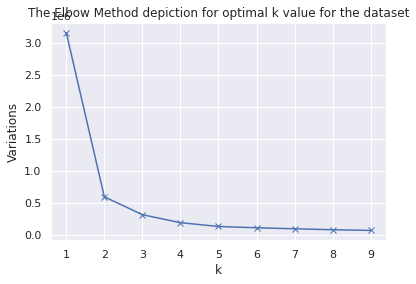

In [19]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
variations = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(sample_data)
    variations.append(kmeanModel.inertia_)

# Plot the Elbow
plt.plot(K, variations, 'bx-')
plt.xlabel('k')
plt.ylabel('Variations')
plt.title('The Elbow Method depiction for optimal k value for the dataset')
plt.show()


Plot before clustering

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

In [21]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [22]:
clusters = kmeans.fit_predict(x)
clusters

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [23]:
Clustered_data = mapped_data.copy()
Clustered_data['cluster'] = clusters
Clustered_data

,location,vaccine,cluster
3,0,0,2
5,0,1,2
7,0,0,2
9,0,1,2
11,0,0,2
...,...,...,...
22116,38,2,0
22117,38,0,0
22118,38,7,0
22119,38,4,0


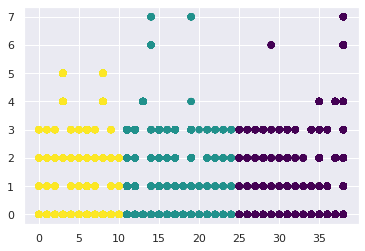

In [24]:
plt.scatter(Clustered_data['location'], Clustered_data['vaccine'], c= Clustered_data['cluster'], cmap='viridis')

plt.show()

###Hierarchical clustering###

In [25]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [26]:
sample_data2 = mapped_data.copy()
sample_data2

,location,vaccine
3,0,0
5,0,1
7,0,0
9,0,1
11,0,0
...,...,...
22116,38,2
22117,38,0
22118,38,7
22119,38,4


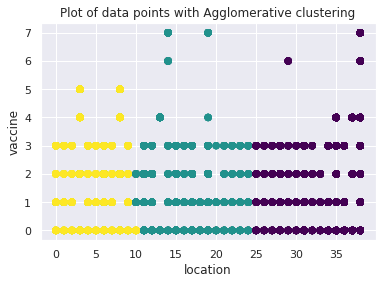

In [32]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_model = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
clust_labels = hierarchical_model.fit_predict(sample_data2)
plt.scatter(sample_data2['location'], sample_data2['vaccine'], c=clust_labels, s=40, cmap='viridis');
plt.xlabel('location')
plt.ylabel('vaccine')
plt.title('Plot of data points with Agglomerative clustering')
plt.show()

###Gaussian mixture models clustering###

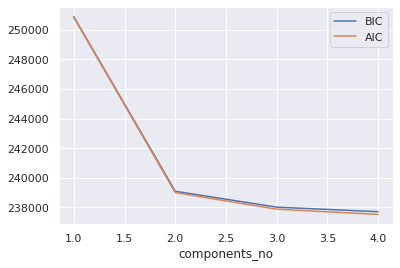

In [112]:
from sklearn.mixture import GaussianMixture

sample_data1 = mapped_data

components_no = np.arange(1, 5)
gmm = [GaussianMixture(n, covariance_type='full', random_state=0).fit(sample_data1)
for n in components_no]
plt.plot(components_no, [m.bic(sample_data) for m in gmm], label='BIC')
plt.plot(components_no, [m.aic(sample_data) for m in gmm], label='AIC')
plt.legend(loc='best')

plt.xlabel('components_no');

In [120]:
gmm = GaussianMixture(n_components=2).fit(sample_data1)
labels = gmm.predict(sample_data1)
# plt.scatter(sample_data1[:,0], sample_data1[:,1], c=labels, s=30, cmap='viridis');
# plt.xlabel('location')
# plt.ylabel('vaccine')
# plt.show()

In [121]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [124]:
probs = gmm.predict_proba(sample_data1)
print(probs[:5].round(3))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


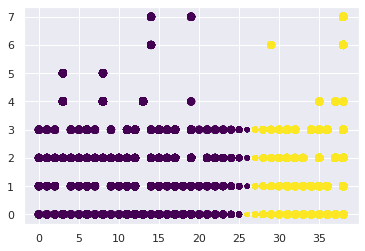

In [128]:
size = 50*probs.max(1)**2
plt.scatter(sample_data1['location'], sample_data1['vaccine'], c=labels, s=size, cmap='viridis');

###DB Scan clustering###

In [33]:
!pip install pycaret

     |████████████████████████████████| 288 kB 7.3 MB/s 
     |████████████████████████████████| 113 kB 43.7 MB/s 
     |████████████████████████████████| 1.3 MB 50.6 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 41.4 MB/s 
     |████████████████████████████████| 261 kB 40.7 MB/s 
     |████████████████████████████████| 1.7 MB 54.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 43.9 MB/s 
     |████████████████████████████████| 16.9 MB 48.6 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 
     |████████████████████████████████| 167 kB 38.8 MB/s 
     |████████████████████████████████| 10.1 MB 58.4 MB/s 
     |████████████████████████████████| 102 kB 10.5 MB/s 
     |████████████████████████████████| 675 kB 44.1 MB/s 
     |████████████████

In [42]:
# from pycaret.clustering import *
from pycaret.datasets import get_data
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [43]:
sample_data3 = mapped_data
df_dbscan = sample_data3.copy()
df_dbscan.head()


,location,vaccine
3,0,0
5,0,1
7,0,0
9,0,1
11,0,0


In [44]:
df_dbscan.shape

(21691, 2)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
scaled_data = scaler.fit_transform(df_dbscan)
scaled_data.shape

(21691, 2)

In [50]:
from sklearn.cluster import DBSCAN

model=DBSCAN(eps=0.04,min_samples=10).fit(scaled_data)
print(model.labels_)

[ 0  1  0 ... 31 27 32]


In [53]:
x['db_cluster_label'] = model.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink']
vectorizer = np.vectorize(lambda : colors[x % len(colors)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'vaccine')

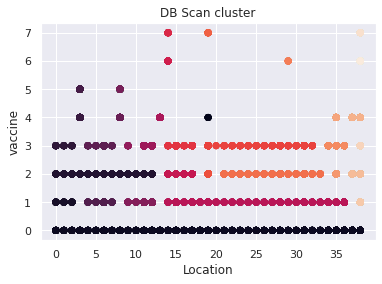

In [56]:
plt.scatter(df_dbscan['location'], df_dbscan['vaccine'], c=x['db_cluster_label']);
plt.title('DB Scan cluster')
plt.xlabel('Location')
plt.ylabel('vaccine')